In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import aplpy
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.seterr(all='ignore')

sns.set(style='ticks', 
        rc={'font.family'          : 'serif',
            'text.usetex'          : True,
            'axes.axisbelow'       : True,
            'mathtext.fontset'     : 'cm',
            'mathtext.default'     : 'regular',
            'xtick.direction'      : 'in',
            'ytick.direction'      : 'in',
       })

pal = sns.color_palette('colorblind')
dark = sns.color_palette('dark')
sns.set_palette(pal)

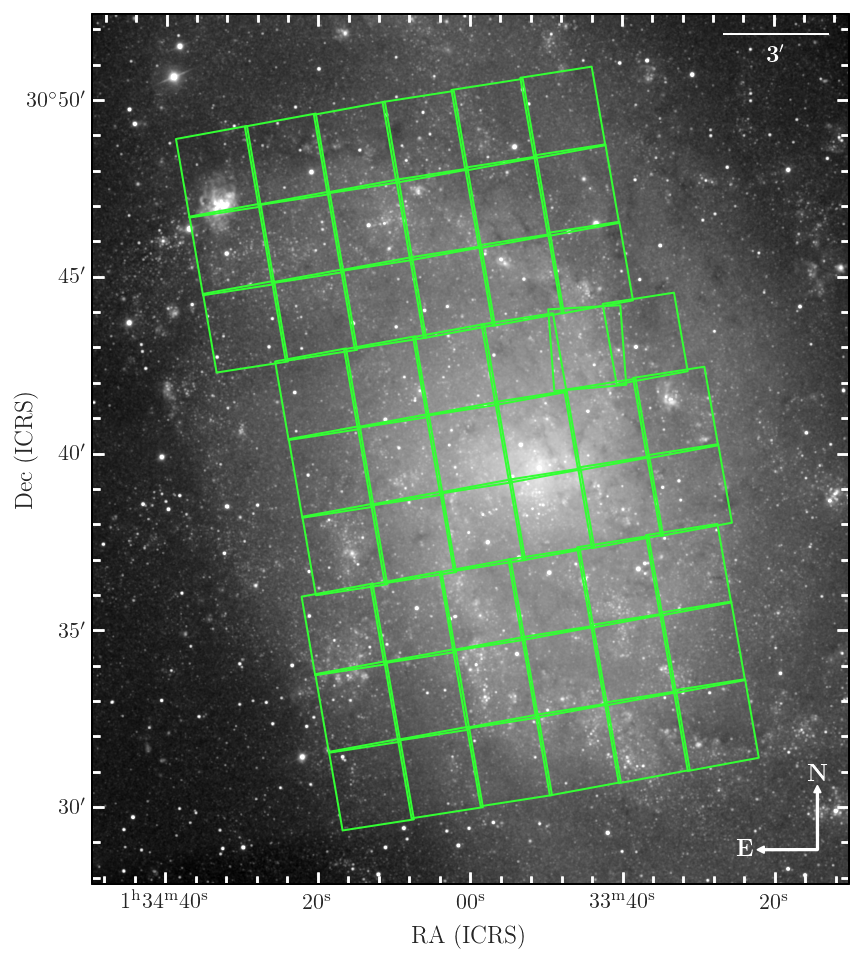

In [2]:
def add_tweaks(fig):
    aplpy.AxisLabels(fig).set_ypad(0)
    fig.show_arrows([23.31, 23.31], [30.48, 30.48], [0., 0.03275], [0.03, 0.],
                    length_includes_head=True, layer='arrows', color='w', edgecolor='w')
    fig.add_label(23.31, 30.515, '${\mathbf{N}}$', color='w')
    fig.add_label(23.35, 30.48, '${\mathbf{E}}$', color='w')
    fig.add_scalebar(3/60, label='$\mathbf{3^{\prime}}$', color='w', corner='top right')

df = pd.read_csv('../header_info.csv', index_col=0)
ra = df[df.FILT_DET == 'IR-F110W'].filter(regex='^RA[0-3]')
dec = df[df.FILT_DET == 'IR-F110W'].filter(regex='^DEC[0-3]')
footprints = np.dstack([ra, dec])

fig = aplpy.FITSFigure('data/M33_SDSS9_r.fits', figsize=(7.2,8))
fig.show_grayscale(stretch='arcsinh', interpolation='bicubic',
                   vmin=0.01, vmax=3.9)
fig.show_polygons(list(footprints), layer='footprints', edgecolor='#33ff33', linewidth=1)
add_tweaks(fig)
plt.savefig('survey_paper_figures/IR_footprints.pdf', dpi=150, bbox_inches='tight')

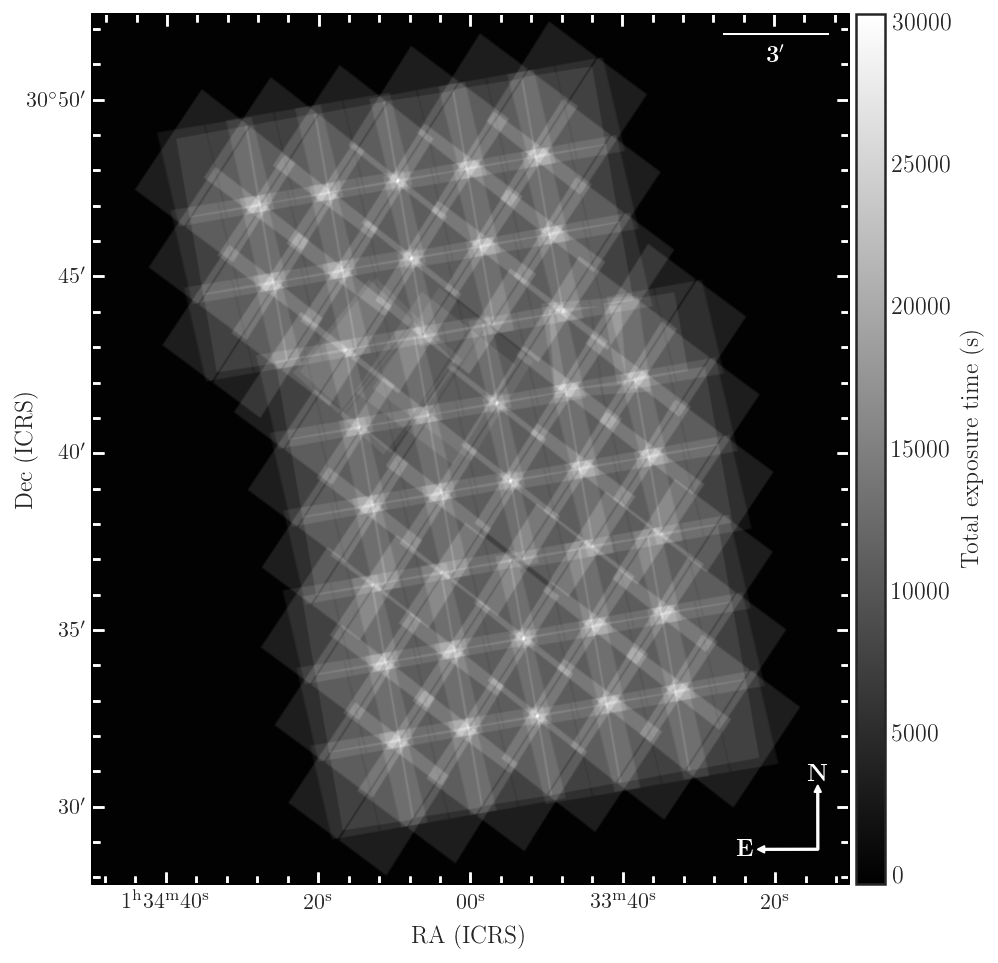

In [3]:
fig = aplpy.FITSFigure('data/exposure_map.fits', figsize=(8,8))
fig.show_grayscale(vmin=-300, vmax=30300, interpolation='bicubic')
fig.add_colorbar()
fig.colorbar.set_axis_label_text('Total exposure time (s)')
add_tweaks(fig)
plt.savefig('survey_paper_figures/total_exptime.pdf', dpi=300, bbox_inches='tight')

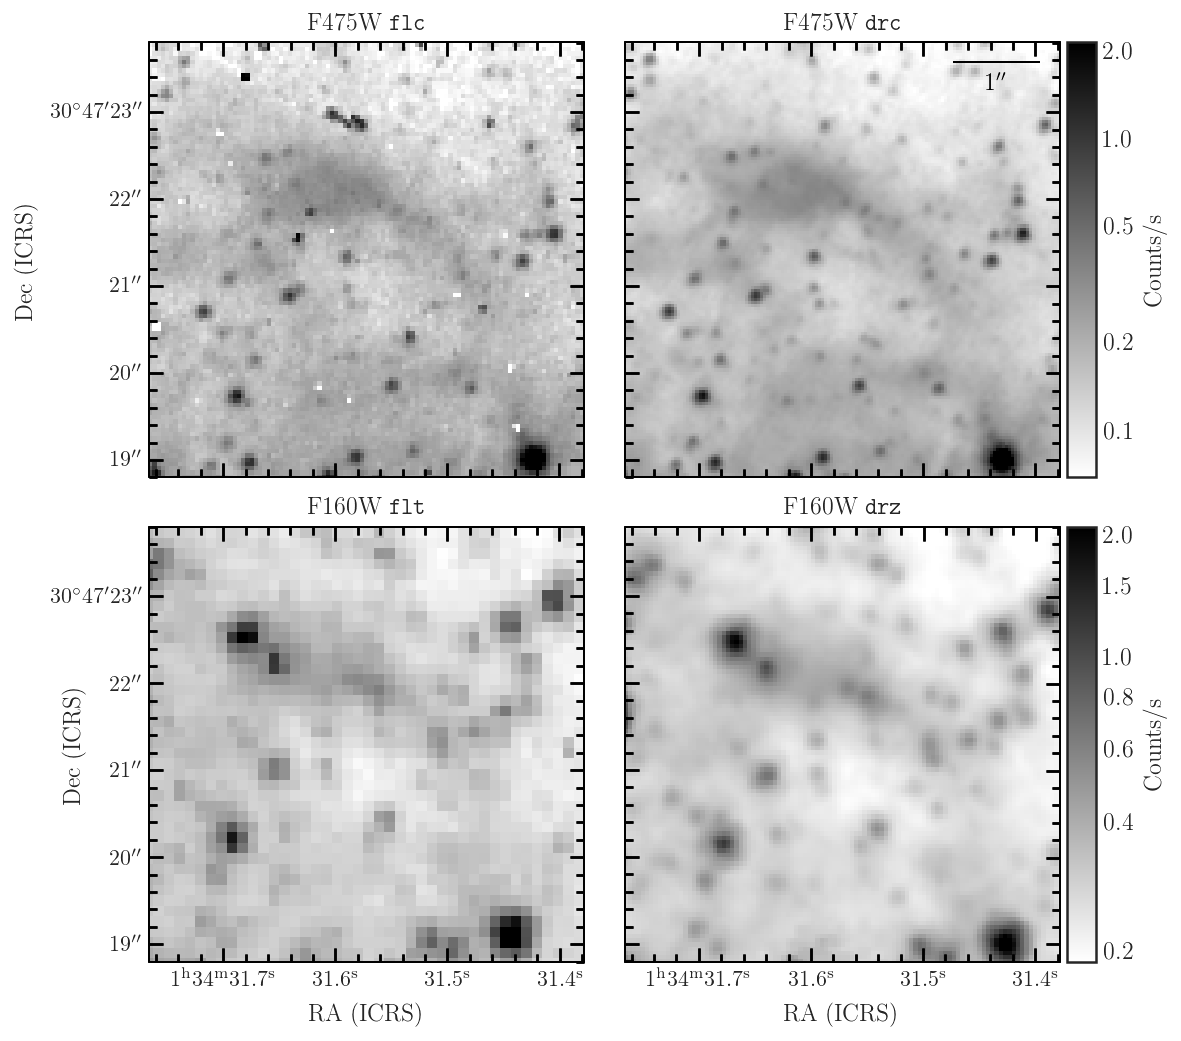

In [4]:
fig = plt.figure(figsize=(8.6, 7.2))
f0 = aplpy.FITSFigure('data/cutouts/F475W_flc_cutout.fits', north=True, figure=fig, subplot=(2,2,1))
f1 = aplpy.FITSFigure('data/cutouts/F475W_drc_cutout.fits', north=True, figure=fig, subplot=(2,2,2))
f2 = aplpy.FITSFigure('data/cutouts/F160W_flt_cutout.fits', north=True, figure=fig, subplot=(2,2,3))
f3 = aplpy.FITSFigure('data/cutouts/F160W_drz_cutout.fits', north=True, figure=fig, subplot=(2,2,4))

for f in [f0, f1, f2, f3]:
    f.set_theme('publication')
    f.recenter(23.63155, 30.78925, radius=2.5/3600)

min_opt, max_opt = 0.07, 2.15
min_ir, max_ir = 0.189, 2.1
f0.show_grayscale(stretch='log', interpolation='nearest',
                  vmin=min_opt, vmax=max_opt)
f1.show_grayscale(stretch='log', interpolation='nearest',
                  vmin=min_opt, vmax=max_opt)
f2.show_grayscale(stretch='log', interpolation='nearest',
                  vmin=min_ir, vmax=max_ir)
f3.show_grayscale(stretch='log', interpolation='nearest',
                  vmin=min_ir, vmax=max_ir)

f1.add_colorbar()
f3.add_colorbar()
f1.colorbar.set_axis_label_text('Counts/s')
f3.colorbar.set_axis_label_text('Counts/s')
f1.colorbar.set_ticks([0.1, 0.2, 0.5, 1, 2])
f3.colorbar.set_ticks([0.2, 0.4, 0.6, 0.8, 1, 1.5, 2])
f0.set_title(r'F475W $\mathrm{\tt{flc}}$')
f1.set_title(r'F475W $\mathrm{\tt{drc}}$')
f2.set_title(r'F160W $\mathrm{\tt{flt}}$')
f3.set_title(r'F160W $\mathrm{\tt{drz}}$')
f1.add_scalebar(1/3600, label='$1^{\prime \prime}$', corner='top right')

aplpy.AxisLabels(f0).set_ypad(-1)
aplpy.AxisLabels(f2).set_ypad(-1)

aplpy.AxisLabels(f0).hide_x()
aplpy.TickLabels(f0).hide_x()
aplpy.AxisLabels(f1).hide()
aplpy.TickLabels(f1).hide()
aplpy.AxisLabels(f3).hide_y()
aplpy.TickLabels(f3).hide_y()

fig.tight_layout(w_pad=0.5, h_pad=2)
fig.savefig('survey_paper_figures/4panel_img.pdf', dpi=300, bbox_inches='tight')